In [1]:
from keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [2]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)

(404, 13)
(102, 13)
(404,)


In [3]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [49]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    return model

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis = 0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis = 0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
          epochs = num_epochs, batch_size = 1)

val_mse, val_mae = model.evaluate(val_data, val_targets)
all_scores.append(val_mae)




W0910 20:01:43.005246 140141827270464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 20:01:43.025310 140141827270464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 20:01:43.028126 140141827270464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0910 20:01:43.060428 140141827270464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.comp

processing flod # 0
processing flod # 1
processing flod # 2
processing flod # 3
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
303/303 [==============================] - 4s 13ms/step - loss: 160.7946 - mean_absolute_error: 9.1410
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 24.8831 - mean_absolute_error: 3.2969
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss:

303/303 [==============================] - 0s 1ms/step - loss: 4.9080 - mean_absolute_error: 1.4589
Epoch 67/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1335 - mean_absolute_error: 1.5051
Epoch 68/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1230 - mean_absolute_error: 1.4631
Epoch 69/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8247 - mean_absolute_error: 1.4435
Epoch 70/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8767 - mean_absolute_error: 1.4406
Epoch 71/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1781 - mean_absolute_error: 1.4364
Epoch 72/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8661 - mean_absolute_error: 1.4170
Epoch 73/100
303/303 [==============================] - 0s 1ms/step - loss: 5.1876 - mean_absolute_error: 1.4542
Epoch 74/100
303/303 [==============================] - 0s 1ms/step - loss: 4.9811 - mean_absolute_error: 1.3

In [50]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing flod #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis = 0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis = 0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data = (val_data, val_targets),
                    epochs = num_epochs, batch_size = 1)

mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)

processing flod # 0
processing flod # 1
processing flod # 2
processing flod # 3
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
________________________________________

Epoch 41/500
303/303 [==============================] - 1s 4ms/step - loss: 7.8851 - mean_absolute_error: 1.9878 - val_loss: 15.5317 - val_mean_absolute_error: 3.1016
Epoch 42/500
303/303 [==============================] - 1s 4ms/step - loss: 7.1892 - mean_absolute_error: 1.8875 - val_loss: 16.3015 - val_mean_absolute_error: 2.9409
Epoch 43/500
303/303 [==============================] - 1s 4ms/step - loss: 7.4703 - mean_absolute_error: 1.8685 - val_loss: 10.3831 - val_mean_absolute_error: 2.3492
Epoch 44/500
303/303 [==============================] - 1s 4ms/step - loss: 7.4035 - mean_absolute_error: 1.9353 - val_loss: 17.1023 - val_mean_absolute_error: 3.1661
Epoch 45/500
303/303 [==============================] - 1s 4ms/step - loss: 7.6383 - mean_absolute_error: 1.9124 - val_loss: 11.7134 - val_mean_absolute_error: 2.4598
Epoch 46/500
303/303 [==============================] - 1s 4ms/step - loss: 7.8729 - mean_absolute_error: 1.8816 - val_loss: 9.9735 - val_mean_absolute_error: 2.2826

303/303 [==============================] - 1s 5ms/step - loss: 4.7915 - mean_absolute_error: 1.4281 - val_loss: 15.9582 - val_mean_absolute_error: 2.8672
Epoch 91/500
303/303 [==============================] - 1s 5ms/step - loss: 4.1985 - mean_absolute_error: 1.4472 - val_loss: 12.4813 - val_mean_absolute_error: 2.4747
Epoch 92/500
303/303 [==============================] - 1s 5ms/step - loss: 4.2257 - mean_absolute_error: 1.3668 - val_loss: 9.0648 - val_mean_absolute_error: 2.2423
Epoch 93/500
303/303 [==============================] - 1s 5ms/step - loss: 4.0720 - mean_absolute_error: 1.4394 - val_loss: 11.7551 - val_mean_absolute_error: 2.4963
Epoch 94/500
303/303 [==============================] - 1s 5ms/step - loss: 4.4750 - mean_absolute_error: 1.4452 - val_loss: 9.7068 - val_mean_absolute_error: 2.2277
Epoch 95/500
303/303 [==============================] - 1s 5ms/step - loss: 3.9393 - mean_absolute_error: 1.3735 - val_loss: 10.1008 - val_mean_absolute_error: 2.2745
Epoch 96/500


Epoch 139/500
303/303 [==============================] - 1s 5ms/step - loss: 3.0968 - mean_absolute_error: 1.1721 - val_loss: 10.7381 - val_mean_absolute_error: 2.4182
Epoch 140/500
303/303 [==============================] - 1s 5ms/step - loss: 2.8645 - mean_absolute_error: 1.1476 - val_loss: 11.1790 - val_mean_absolute_error: 2.4481
Epoch 141/500
303/303 [==============================] - 1s 5ms/step - loss: 2.5913 - mean_absolute_error: 1.0825 - val_loss: 11.6112 - val_mean_absolute_error: 2.4906
Epoch 142/500
303/303 [==============================] - 1s 5ms/step - loss: 3.2916 - mean_absolute_error: 1.1405 - val_loss: 11.8710 - val_mean_absolute_error: 2.4736
Epoch 143/500
303/303 [==============================] - 2s 5ms/step - loss: 3.2042 - mean_absolute_error: 1.1523 - val_loss: 11.9484 - val_mean_absolute_error: 2.5482
Epoch 144/500
303/303 [==============================] - 1s 5ms/step - loss: 2.8679 - mean_absolute_error: 1.1329 - val_loss: 12.9372 - val_mean_absolute_error:

Epoch 188/500
303/303 [==============================] - 2s 5ms/step - loss: 2.0088 - mean_absolute_error: 0.9815 - val_loss: 9.5319 - val_mean_absolute_error: 2.3247
Epoch 189/500
303/303 [==============================] - 2s 5ms/step - loss: 2.1484 - mean_absolute_error: 0.9976 - val_loss: 11.8643 - val_mean_absolute_error: 2.5055
Epoch 190/500
303/303 [==============================] - 2s 5ms/step - loss: 2.2944 - mean_absolute_error: 0.9763 - val_loss: 11.5326 - val_mean_absolute_error: 2.5174
Epoch 191/500
303/303 [==============================] - 2s 5ms/step - loss: 2.4135 - mean_absolute_error: 1.0609 - val_loss: 16.4944 - val_mean_absolute_error: 3.0557
Epoch 192/500
303/303 [==============================] - 2s 5ms/step - loss: 2.5997 - mean_absolute_error: 1.0145 - val_loss: 12.5962 - val_mean_absolute_error: 2.6221
Epoch 193/500
303/303 [==============================] - 2s 5ms/step - loss: 2.3729 - mean_absolute_error: 0.9994 - val_loss: 11.0506 - val_mean_absolute_error: 

Epoch 237/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8874 - mean_absolute_error: 0.8427 - val_loss: 12.8224 - val_mean_absolute_error: 2.6384
Epoch 238/500
303/303 [==============================] - 2s 5ms/step - loss: 1.9269 - mean_absolute_error: 0.9545 - val_loss: 11.3701 - val_mean_absolute_error: 2.4361
Epoch 239/500
303/303 [==============================] - 1s 5ms/step - loss: 1.6095 - mean_absolute_error: 0.8895 - val_loss: 11.1676 - val_mean_absolute_error: 2.4694
Epoch 240/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8198 - mean_absolute_error: 0.8642 - val_loss: 11.5424 - val_mean_absolute_error: 2.4554
Epoch 241/500
303/303 [==============================] - 1s 5ms/step - loss: 1.8262 - mean_absolute_error: 0.8556 - val_loss: 11.5319 - val_mean_absolute_error: 2.5392
Epoch 242/500
303/303 [==============================] - 1s 5ms/step - loss: 2.1279 - mean_absolute_error: 0.8475 - val_loss: 12.6580 - val_mean_absolute_error:

Epoch 286/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8541 - mean_absolute_error: 0.8193 - val_loss: 10.3100 - val_mean_absolute_error: 2.4564
Epoch 287/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4010 - mean_absolute_error: 0.7605 - val_loss: 11.1293 - val_mean_absolute_error: 2.4162
Epoch 288/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4457 - mean_absolute_error: 0.7589 - val_loss: 21.0215 - val_mean_absolute_error: 3.5762
Epoch 289/500
303/303 [==============================] - 1s 4ms/step - loss: 1.7986 - mean_absolute_error: 0.8538 - val_loss: 12.6985 - val_mean_absolute_error: 2.5964
Epoch 290/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4292 - mean_absolute_error: 0.7970 - val_loss: 10.7838 - val_mean_absolute_error: 2.4106
Epoch 291/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4774 - mean_absolute_error: 0.7337 - val_loss: 12.2426 - val_mean_absolute_error:

Epoch 335/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4533 - mean_absolute_error: 0.7429 - val_loss: 10.7174 - val_mean_absolute_error: 2.4695
Epoch 336/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4615 - mean_absolute_error: 0.7567 - val_loss: 11.2488 - val_mean_absolute_error: 2.5150
Epoch 337/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2056 - mean_absolute_error: 0.6605 - val_loss: 13.2022 - val_mean_absolute_error: 2.5845
Epoch 338/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3340 - mean_absolute_error: 0.7370 - val_loss: 13.1538 - val_mean_absolute_error: 2.6645
Epoch 339/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1010 - mean_absolute_error: 0.6906 - val_loss: 11.1546 - val_mean_absolute_error: 2.4192
Epoch 340/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2553 - mean_absolute_error: 0.6984 - val_loss: 12.3882 - val_mean_absolute_error:

Epoch 384/500
303/303 [==============================] - 1s 5ms/step - loss: 1.2468 - mean_absolute_error: 0.6395 - val_loss: 13.1246 - val_mean_absolute_error: 2.6535
Epoch 385/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0784 - mean_absolute_error: 0.6681 - val_loss: 13.4226 - val_mean_absolute_error: 2.6362
Epoch 386/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0733 - mean_absolute_error: 0.6748 - val_loss: 14.4492 - val_mean_absolute_error: 2.7464
Epoch 387/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0772 - mean_absolute_error: 0.6495 - val_loss: 12.6194 - val_mean_absolute_error: 2.5871
Epoch 388/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9760 - mean_absolute_error: 0.6052 - val_loss: 12.8103 - val_mean_absolute_error: 2.5354
Epoch 389/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3381 - mean_absolute_error: 0.6797 - val_loss: 11.5749 - val_mean_absolute_error:

Epoch 433/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9962 - mean_absolute_error: 0.5962 - val_loss: 12.7440 - val_mean_absolute_error: 2.4801
Epoch 434/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2971 - mean_absolute_error: 0.7164 - val_loss: 14.3617 - val_mean_absolute_error: 2.8552
Epoch 435/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1559 - mean_absolute_error: 0.6872 - val_loss: 12.4891 - val_mean_absolute_error: 2.4938
Epoch 436/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9808 - mean_absolute_error: 0.6354 - val_loss: 13.1283 - val_mean_absolute_error: 2.5658
Epoch 437/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0460 - mean_absolute_error: 0.6358 - val_loss: 13.2025 - val_mean_absolute_error: 2.5937
Epoch 438/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0420 - mean_absolute_error: 0.6326 - val_loss: 12.0685 - val_mean_absolute_error:

Epoch 482/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9509 - mean_absolute_error: 0.5537 - val_loss: 14.6292 - val_mean_absolute_error: 2.7523
Epoch 483/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7560 - mean_absolute_error: 0.5286 - val_loss: 12.2982 - val_mean_absolute_error: 2.6070
Epoch 484/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9308 - mean_absolute_error: 0.5975 - val_loss: 11.3670 - val_mean_absolute_error: 2.4117
Epoch 485/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9708 - mean_absolute_error: 0.5671 - val_loss: 11.8272 - val_mean_absolute_error: 2.4746
Epoch 486/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1331 - mean_absolute_error: 0.6008 - val_loss: 11.3795 - val_mean_absolute_error: 2.4209
Epoch 487/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9844 - mean_absolute_error: 0.5892 - val_loss: 12.0809 - val_mean_absolute_error:

In [51]:
# print(history.history.keys())
# print(all_mae_histories)
# print(len(all_mae_histories))
# print("######################")
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# print(average_mae_history)
# print(all_mae_histories.shape, average_mae_history.shape)

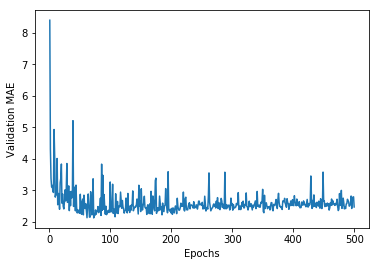

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

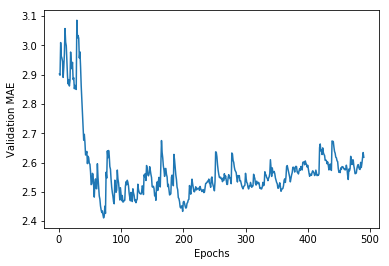

In [53]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [58]:
model_after = build_model()
model_after.fit(train_data, train_targets,
                epochs = 200, batch_size = 16)
test_mse_score, test_mae_score = model_after.evaluate(test_data, test_targets)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_49 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_54 (Dense)             (None, 64)              

404/404 [==============================] - 0s 164us/step - loss: 7.1172 - mean_absolute_error: 1.9850
Epoch 59/200
404/404 [==============================] - 0s 154us/step - loss: 8.0326 - mean_absolute_error: 2.1201
Epoch 60/200
404/404 [==============================] - 0s 154us/step - loss: 7.0517 - mean_absolute_error: 1.8862
Epoch 61/200
404/404 [==============================] - 0s 155us/step - loss: 6.1623 - mean_absolute_error: 1.7826
Epoch 62/200
404/404 [==============================] - 0s 159us/step - loss: 5.5855 - mean_absolute_error: 1.8202
Epoch 63/200
404/404 [==============================] - 0s 149us/step - loss: 6.8288 - mean_absolute_error: 1.9890
Epoch 64/200
404/404 [==============================] - 0s 154us/step - loss: 6.3453 - mean_absolute_error: 1.9092
Epoch 65/200
404/404 [==============================] - 0s 150us/step - loss: 7.5496 - mean_absolute_error: 1.9707
Epoch 66/200
404/404 [==============================] - 0s 152us/step - loss: 7.4694 - mean_a

404/404 [==============================] - 0s 179us/step - loss: 3.8854 - mean_absolute_error: 1.3842
Epoch 130/200
404/404 [==============================] - 0s 183us/step - loss: 3.8336 - mean_absolute_error: 1.3816
Epoch 131/200
404/404 [==============================] - 0s 181us/step - loss: 3.7023 - mean_absolute_error: 1.3745
Epoch 132/200
404/404 [==============================] - 0s 187us/step - loss: 3.5761 - mean_absolute_error: 1.3226
Epoch 133/200
404/404 [==============================] - 0s 181us/step - loss: 3.3810 - mean_absolute_error: 1.3806
Epoch 134/200
404/404 [==============================] - 0s 184us/step - loss: 4.0917 - mean_absolute_error: 1.3419
Epoch 135/200
404/404 [==============================] - 0s 183us/step - loss: 2.9196 - mean_absolute_error: 1.2594
Epoch 136/200
404/404 [==============================] - 0s 179us/step - loss: 4.6620 - mean_absolute_error: 1.6187
Epoch 137/200
404/404 [==============================] - 0s 182us/step - loss: 3.1108 

404/404 [==============================] - 0s 181us/step - loss: 2.6898 - mean_absolute_error: 1.1075
Epoch 200/200
102/102 [==============================] - 0s 1ms/step


In [57]:
test_mae_score

2.532679230559106